In [61]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from utils.helpers.pandas_helpers import keep_levels, index_slice
from objects.signals.individual.momentum import Momentum
from objects.signals.individual.fair_value.pca import PCA
from objects.signals.combination.simple_combination import SignalSelector
from objects.signals.combination.ml_combination import MLSignalSelector
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# STEP 1: Select Investment universe

In [34]:

investment_universe = [
    'XRP/USDC:USDC',
    'SOL/USDC:USDC',
    'ADA/USDC:USDC',
    'BTC/USDC:USDC',
    'ETH/USDC:USDC']

# Read prices
- We will start reading the prices updated hourly
- Keep open prices
- Subset --> Investment universe

In [42]:
df= pd.read_parquet('/Users/educontreras/PycharmProjects/crypto_signals/objects/retriever/hourly_prices.parquet')
df.columns = df.columns.rename("field", level=0)
close_df = keep_levels(index_slice(df, field = 'close'), ['symbol'])

df_subset = close_df.loc[:, investment_universe]
returns_df = df_subset.pct_change().dropna(how = 'any')

In [63]:
all_windows = [6, 12, 24]
tstat_signal = Momentum.tstat(returns_df, windows = all_windows)
pca_signal =  PCA.rolling_pca(df_subset, windows = [100, 200, 300])
sma_signal = Momentum.sma(df_subset, windows = [6, 12, 24])
ema_signal = Momentum.ema(df_subset, windows = [6, 12, 24])
hma_signal = Momentum.ema(df_subset, windows = [6, 12, 24])
rsi_signal = Momentum.rsi(df_subset, windows = [6, 12, 24])

2024-12-22 17:23:52.261 | INFO     | objects.signals.individual.momentum:tstat:139 - Computing momentum tstat signal
2024-12-22 17:23:52.261 | INFO     | objects.signals.individual.momentum:tstat:142 - ASSET - XRP/USDC:USDC
2024-12-22 17:23:52.265 | INFO     | objects.signals.individual.momentum:tstat:145 - WINDOW - 6
2024-12-22 17:23:52.278 | INFO     | objects.signals.individual.momentum:tstat:145 - WINDOW - 12
2024-12-22 17:23:52.287 | INFO     | objects.signals.individual.momentum:tstat:145 - WINDOW - 24
2024-12-22 17:23:52.297 | INFO     | objects.signals.individual.momentum:tstat:142 - ASSET - SOL/USDC:USDC
2024-12-22 17:23:52.299 | INFO     | objects.signals.individual.momentum:tstat:145 - WINDOW - 6
2024-12-22 17:23:52.308 | INFO     | objects.signals.individual.momentum:tstat:145 - WINDOW - 12
2024-12-22 17:23:52.317 | INFO     | objects.signals.individual.momentum:tstat:145 - WINDOW - 24
2024-12-22 17:23:52.326 | INFO     | objects.signals.individual.momentum:tstat:142 - ASSE

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [64]:
pca_signal

NameError: name 'pca_signal' is not defined

In [54]:

xover_signal = SignalSelector.crossover_signal(sma_signal, windows = [6,12, 24], window_level='period', asset_level='symbol')

2024-12-22 17:01:43.090 | INFO     | objects.signals.combination.simple_combination:crossover_signal:60 - Computing crossover for individual signals
2024-12-22 17:01:43.097 | INFO     | objects.signals.combination.simple_combination:crossover_signal:67 - ASSET: ADA/USDC:USDC
2024-12-22 17:01:48.687 | INFO     | objects.signals.combination.simple_combination:crossover_signal:67 - ASSET: BTC/USDC:USDC
2024-12-22 17:01:53.873 | INFO     | objects.signals.combination.simple_combination:crossover_signal:67 - ASSET: ETH/USDC:USDC
2024-12-22 17:01:59.028 | INFO     | objects.signals.combination.simple_combination:crossover_signal:67 - ASSET: SOL/USDC:USDC
2024-12-22 17:02:04.372 | INFO     | objects.signals.combination.simple_combination:crossover_signal:67 - ASSET: XRP/USDC:USDC


In [ ]:
ml_signal = MLSignalSelector.random_forest(signal,returns_df,window_level='period', asset_level = 'symbol')

/var/folders/mc/sd8lk0kn4fz1q41w5qdn2fhc0000gn/T/ipykernel_24739/4144339834.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if positions[i-1] == 0:  # No position in the previous period
/var/folders/mc/sd8lk0kn4fz1q41w5qdn2fhc0000gn/T/ipykernel_24739/4144339834.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if signal[i] >= 0.5:
/var/folders/mc/sd8lk0kn4fz1q41w5qdn2fhc0000gn/T/ipykernel_24739/4144339834.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

<Axes: title={'center': 'Cumulative Strategy Returns for All Assets'}, xlabel='timestamp'>

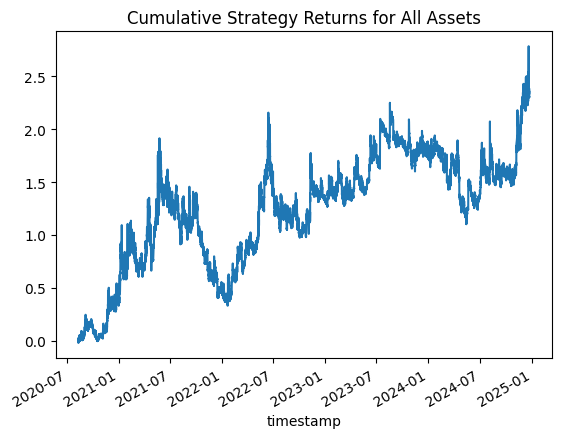

In [57]:
import pandas as pd
import numpy as np

# Asumiendo que 'individual_signal' y 'returns_df' ya están definidos

import pandas as pd
import numpy as np

def strategy_returns_multiple(individual_signal: pd.DataFrame, returns_df: pd.DataFrame) ->pd.DataFrame:
    """
    Simulates a strategy for multiple signals (assets) based on given thresholds and calculates 
    the cumulative strategy returns for each asset.
    
    Args:
    - individual_signal (pd.DataFrame): A DataFrame containing the signals for each asset (multiple columns).
    - returns_df (pd.DataFrame): A DataFrame containing the returns of each asset (in percentage).

    Returns:
    - pd.DataFrame: A DataFrame with the cumulative strategy returns (in percentage) for each asset.
    """
    # Initialize a DataFrame to store the cumulative strategy returns for each asset
    cumulative_returns_all_assets = pd.DataFrame(index=individual_signal.index)
    
    # Iterate through each column (asset) in the individual_signal DataFrame
    for asset in individual_signal.columns:
        signal = individual_signal[asset]  # Signal for the current asset
        
        # Initialize positions: 0 = no position, 1 = long, -1 = short
        positions = pd.Series(0, index=signal.index)
        
        # Strategy logic
        for i in range(1, len(signal)):
            if positions[i-1] == 0:  # No position in the previous period
                # Enter long if signal > 0.8
                if signal[i] >= 0.5:
                    positions[i] = 1  # Long position
                # Enter short if signal < -0.8
                elif signal[i] <= -0.5:
                    positions[i] = -1  # Short position
            elif positions[i-1] == 1:  # Long position in the previous period
                # Exit long position if signal <= 0.2
                if signal[i] <= 0:
                    positions[i] = 0  # Close long position
                else:
                    positions[i] = 1  # Keep long position
            elif positions[i-1] == -1:  # Short position in the previous period
                # Exit short position if signal >= -0.2
                if signal[i] >= -0:
                    positions[i] = 0  # Close short position
                else:
                    positions[i] = -1  # Keep short position
        
        # Calculate returns of the strategy for the current asset (percentage returns)
        strategy_returns = positions.shift(1) * returns_df[asset]  # Strategy returns (as percentage)
        
        # Calculate cumulative returns using compound return formula
        cumulative_returns = (1 + strategy_returns).cumprod() - 1  # Convert percentage to decimal for compounding
        
        # Store the cumulative returns for this asset
        cumulative_returns_all_assets[asset] = cumulative_returns

    return cumulative_returns_all_assets

# Example usage
# 'individual_signal' contains the signals for each asset, and 'returns_df' contains the returns of each asset
strategy_returns_all_assets = strategy_returns_multiple(xover_signal, returns_df)


# Optionally, plot the cumulative returns for all assets
strategy_returns_all_assets.mean(axis = 1).plot(title='Cumulative Strategy Returns for All Assets')



<Axes: xlabel='timestamp'>

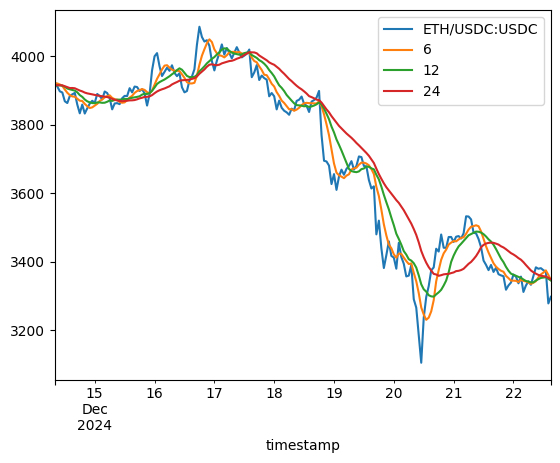

In [58]:
signal_to_plot = keep_levels(index_slice(sma_signal, symbol = 'ETH/USDC:USDC'), ['period'])
pd.merge(df_subset.loc[:, ['ETH/USDC:USDC']], signal_to_plot, left_index = True, right_index=True).tail(200).plot()

<Axes: xlabel='timestamp'>

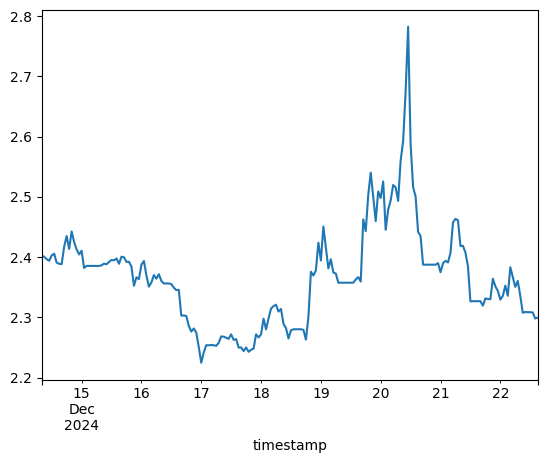

In [60]:
strategy_returns_all_assets.mean(axis = 1).tail(200).plot()

[autoreload of __main__ failed: Traceback (most recent call last):
  File "/Users/educontreras/PycharmProjects/crypto_signals/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/educontreras/PycharmProjects/crypto_signals/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/importlib/__init__.py", line 148, in reload
    raise ImportError(msg.format(name), name=name)
ImportError: module objects.data_manipulation.normalizer not in sys.modules
]
2024-12-22 19:25:35.836 | INFO     | objects.data_manipulation.normalizer:compute_z_scores:18 - Starting Z-Score computation
2024-12-22 19:25:35.836 | INFO     | objects.data_manipulation.normalizer:compute_z_scores:22 - Computing Z-Score for window size 100
2024-12-22 19:25:35.847 | INFO     | objects.data_mani

<Axes: xlabel='period,symbol'>

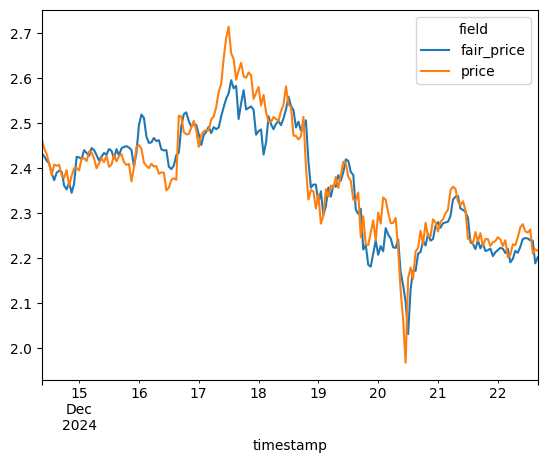

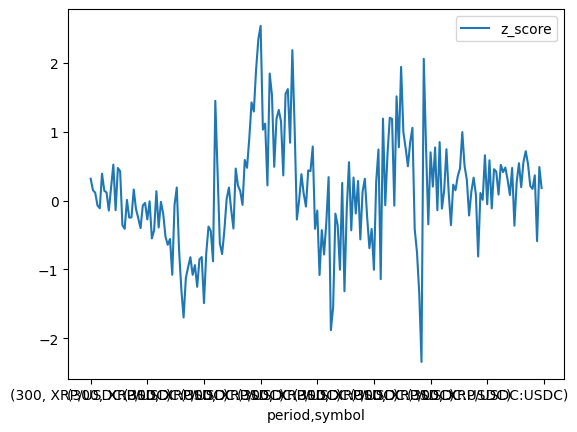

In [83]:
from objects.data_manipulation.normalizer import Normalizer
fv_df = keep_levels(index_slice(pca_df, symbol = 'XRP/USDC:USDC', period = 100, field = ['fair_price', 'price']), ['field']).dropna()
diff_df = keep_levels(index_slice(pca_df, period = 100, field = ['difference']), ['symbol']).dropna()
z_df = Normalizer.compute_z_scores(diff_df, windows = [100, 200, 300])
fv_df.tail(200).plot()
z_df.tail(200).plot()

In [80]:
z_df

z_score
period symbol                 
100    ADA/USDC:USDC       NaN
       ADA/USDC:USDC       NaN
       ADA/USDC:USDC       NaN
       ADA/USDC:USDC       NaN
       ADA/USDC:USDC       NaN
...                        ...
300    XRP/USDC:USDC  0.170170
       XRP/USDC:USDC  0.367424
       XRP/USDC:USDC -0.589163
       XRP/USDC:USDC  0.488605
       XRP/USDC:USDC  0.181801

[572205 rows x 1 columns]